### This script contains:
##### Import libraries
##### Import dataframe
##### Create a correlation matrix heatmap (colored)
##### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships
##### Create a pair plot of the entire data set
##### Create a categorical plot and interpret the results
##### Key Question #1: What is the distribution of AQI values across the cities?
##### Key Question #2: What are the countries with the highest and lowest AQI values?
##### Key Question #3: Can we identify any correlations between individual pollutants (CO, Ozone, NO2, PM2.5) and the overall AQI?
##### Key Question #4: How does AQI value vary across different countries density?
##### Key Question #5: What are the cities with the highest and lowest AQI values?
##### Hyphotesis

### Import libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import dataframe

In [2]:
# Importing data sets using the path as string
path = r'C:\Users\loren\Desktop\Career Foundry\2. Data Immersion Course\A6 Advanced Analytics & Dashboard Design\08-2023 Air Quality Analysis\02 Data'
df = pd.read_pickle(os.path.join(path, 'AQI_Cleaned.pkl'))
df2 = pd.read_csv(os.path.join(path, 'AQI_Relationships.csv'), index_col = False)

In [3]:
# Changing value name
df['Country'] = df['Country'].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")

In [4]:
# Checking dataframe
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate


In [5]:
df2.head()

,Country,Density,Forested Area
0,Afghanistan,60.0,0.02
1,Albania,105.0,0.28
2,Algeria,18.0,0.01
3,Andorra,164.0,0.34
4,Angola,26.0,0.46


### Create a correlation matrix heatmap (colored)

In [6]:
# Calculating the correlation matrix
matrix = df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

In [7]:
# Checking correlations between numeric variables
matrix

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.495144,0.348281,0.308366,0.979874
CO AQI Value,0.495144,1.000000,0.074985,0.433509,0.493940
Ozone AQI Value,0.348281,0.074985,1.000000,-0.229369,0.252082
NO2 AQI Value,0.308366,0.433509,-0.229369,1.000000,0.339855
PM2.5 AQI Value,0.979874,0.493940,0.252082,0.339855,1.000000


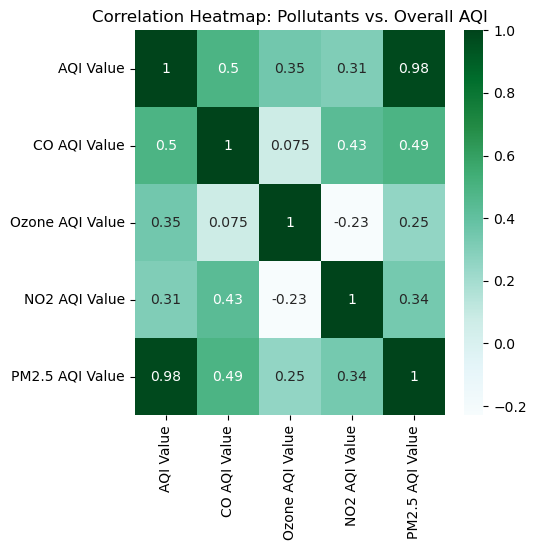

In [8]:
# Creating heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(data=matrix, cmap='BuGn', annot=True)
plt.title('Correlation Heatmap: Pollutants vs. Overall AQI')
plt.show()
# I saved as .png with a right-click on the image

> There is a strong positive correlation (0.98) between the overall AQI Value and PM2.5 AQI Value. Higher overall AQI values are associated with elevated PM2.5 AQI levels.

> There is a moderate positive correlation (0.49) between the overall AQI Value and CO AQI Value. Higher overall AQI values tend to coincide with higher CO AQI levels.

> There are weak positive correlations between the overall AQI Value and Ozone AQI Value (0.34) as well as NO2 AQI Value (0.31). This suggests a potential relationship between higher overall AQI values and higher ozone and NO2 AQI levels.

### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

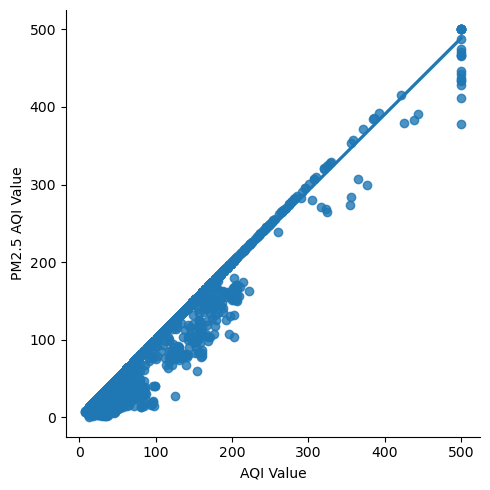

In [9]:
# Creating a scatter plot for AQI Value vs. PM2.5 AQI Value
sns.lmplot(x = 'AQI Value', y = 'PM2.5 AQI Value', data = df)

> The plot confirms a positive strong correlation between the variables analysed. It is notable the PM2.5 AQI Value is never higher than the Overall AQI Value.

### Create a pair plot of the entire data set

In [10]:
# Keeping only the variables to use in the pair plot
pairplot = df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

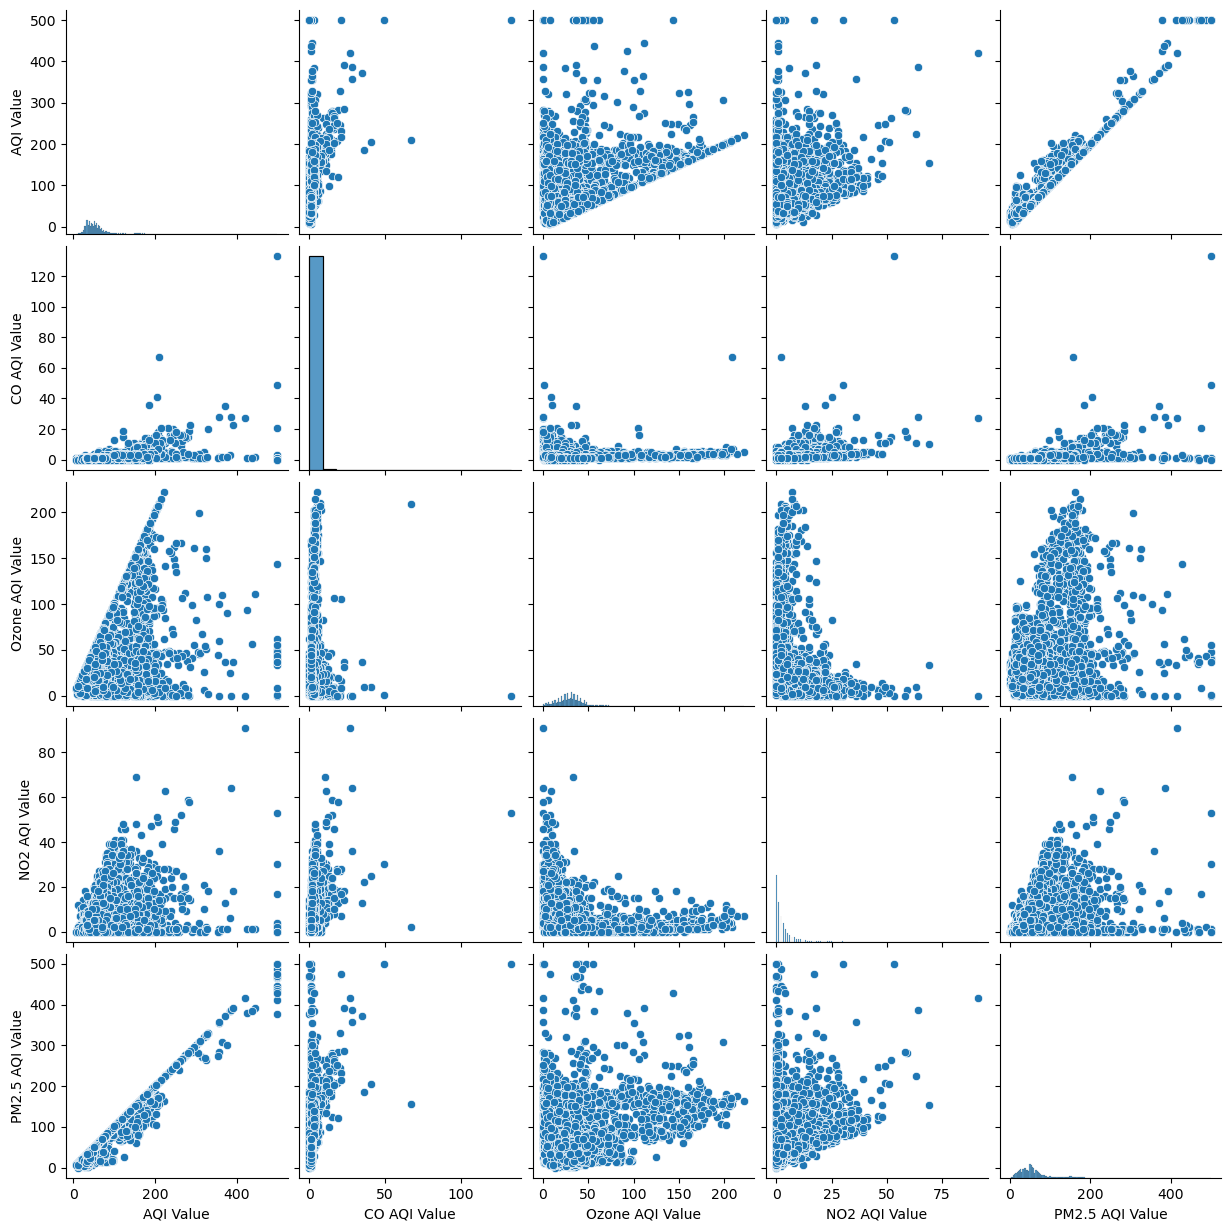

In [11]:
# Checking pairplot
sns.pairplot(pairplot)

> The pairplot confirms the strong positive correlation between AQI Value and PM2.5. A hight Ozone level not necessarily leads to a hight CO AQI Value

### Create a categorical plot and interpret the results

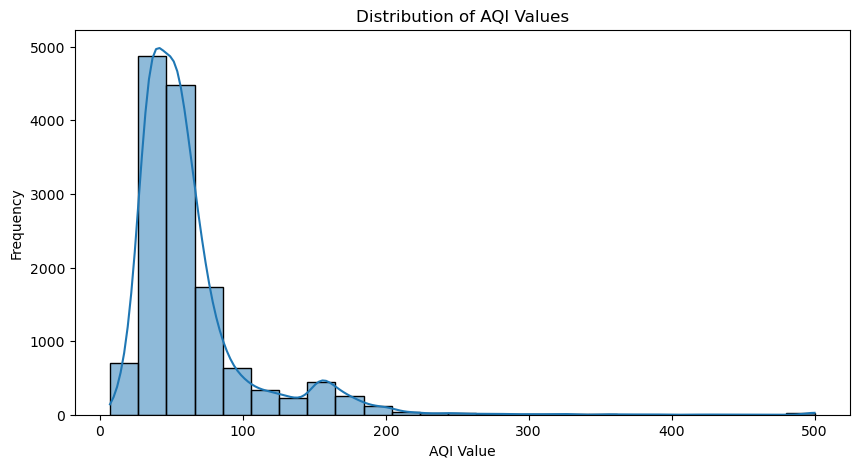

In [12]:
# Creating a histogram to visualize the distribution of the variable
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='AQI Value', bins=25, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Set display options to show all rows of output
pd.set_option('display.max_rows', None)

In [14]:
# My dataframe already has a categorical variable derived from AQI Value 
df['AQI Category'].value_counts(dropna = False)

Good                              6497
Moderate                          5788
Unhealthy                          767
Unhealthy for Sensitive Groups     735
Very Unhealthy                     120
Hazardous                           49
Name: AQI Category, dtype: int64

In [15]:
# Listing countries to use on the categorical plot
countries = ['United States of America', 'China', 'Russian Federation', 'India', 'Italy', 'Germany', 'United Kingdom', 'Japan', 'France', 'Brazil']

In [16]:
# Filtering the DataFrame to include only the important countries
df_filter = df[df['Country'].isin(countries)]

In [17]:
# Replacing the long country name with the shorter version
df_filter['Country'] = df_filter['Country'].replace("United States of America", "USA")
df_filter['Country'] = df_filter['Country'].replace("Russian Federation", "Russia")

C:\Users\loren\AppData\Local\Temp\ipykernel_13028\540458988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Country'] = df_filter['Country'].replace("United States of America", "USA")
C:\Users\loren\AppData\Local\Temp\ipykernel_13028\540458988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Country'] = df_filter['Country'].replace("Russian Federation", "Russia")


<Figure size 2500x500 with 0 Axes>

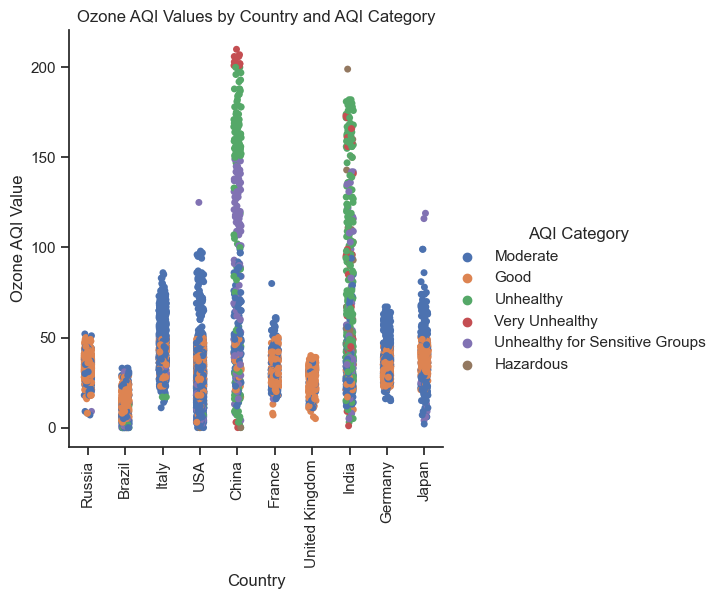

In [18]:
# Creating a categorical plot in seaborn
plt.figure(figsize=(25, 5))
sns.set(style="ticks")
sns.catplot(x="Country", y="Ozone AQI Value", hue="AQI Category", data=df_filter)
plt.title('Ozone AQI Values by Country and AQI Category')
plt.xlabel('Country')
plt.ylabel('Ozone AQI Value')
plt.xticks(rotation=90)
plt.show()

> China and India has the highest distribution range of Ozone Values and are the only ones we can observe some cities classified as Very Unhealth AQI. Brasil, Russia and UK have a short distribution range of Ozone and cities have good and/or moderate AQI Values

### Key Question #1: What is the distribution of AQI values across the cities?

Most of the cities (6497) has an AQI classified as Good, followed by Moderate AQI's (5788) while 49 cities has Very Unhealthy AQI (see histogram created on this notebook to visualize the AQI distribution)

### Key Question #2: What are the countries with the highest and lowest AQI values?

In [19]:
# Calculating the average AQI value for each country
AQI_by_country = df.groupby('Country')['AQI Value'].mean().reset_index()

In [20]:
# Renaming new variable
AQI_by_country.rename(columns={'AQI Value': 'Avg AQI by Country'}, inplace=True)

In [21]:
# Creating a subset
top_countries = AQI_by_country.drop_duplicates(subset=['Country'])

In [22]:
# Sorting result
top_countries.sort_values(by='Avg AQI by Country', ascending=False).head(10)

,Country,Avg AQI by Country
126,Republic of Korea,421.000000
11,Bahrain,188.000000
116,Pakistan,184.336735
134,Saudi Arabia,166.250000
98,Mauritania,164.000000
125,Qatar,164.000000
163,United Arab Emirates,163.666667
7,Aruba,163.000000
82,Kuwait,161.000000
115,Oman,155.000000


In [23]:
# Sorting result
top_countries.sort_values(by='Avg AQI by Country', ascending=True).head(10)

,Country,Avg AQI by Country
117,Palau,16.000000
142,Solomon Islands,18.000000
95,Maldives,19.000000
68,Iceland,23.000000
19,Bolivia (Plurinational State of),24.875000
119,Papua New Guinea,25.285714
137,Seychelles,26.000000
18,Bhutan,26.000000
91,Luxembourg,26.000000
167,Uruguay,26.500000


The countries with highest AQI values are: Republic of Korea, Bahrain, Pakistan, Saudi Arabia	and Mauritania. And with the lowest values are: Palau, Solomon Islands, Maldives, Iceland and Bolivia

### Key Question #3: Can we identify any correlations between individual pollutants (CO, Ozone, NO2, PM2.5) and the overall AQI?

There is a strong positive correlation between PM2.5 and the overall AQI (observe heatmap created on beggining of this notebook)

### Key Question #4: How does AQI value vary across different countries density?

To answer this question, I will merge a second dataframe, previsouly wrnagled and cleaned. It contains two variables only (Country and Density)

In [24]:
# Merging dataframes
df_merged = df.merge(df2, on = 'Country', indicator = 'True')

In [25]:
# Checking if values were merged correctly
df_merged['True'].value_counts()

both          13612
left_only         0
right_only        0
Name: True, dtype: int64

In [26]:
# Checking dataframe merged
df_merged.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Density,Forested Area,True
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,9.0,0.5,both
1,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,9.0,0.5,both
2,Russian Federation,Polevskoy,31,Good,1,Good,31,Good,0,Good,17,Good,9.0,0.5,both
3,Russian Federation,Dalnegorsk,29,Good,0,Good,29,Good,0,Good,25,Good,9.0,0.5,both
4,Russian Federation,Gukovo,38,Good,1,Good,38,Good,0,Good,13,Good,9.0,0.5,both


In [27]:
# Creating subset with variables grouped
subset = df_merged.groupby('Country').agg({'AQI Value': 'mean', 'Density': 'mean'}).reset_index()

In [28]:
# Naming new variables resulted from grouping
subset.rename(columns={'AQI Value': 'AQI by Country', 'Density': 'Density by Country'}, inplace=True)

In [29]:
# Checking subset sorted
subset.sort_values(by='Density by Country', ascending=False)

,Country,AQI by Country,Density by Country
90,Monaco,56.000000,26337.0
125,Singapore,91.000000,8358.0
10,Bahrain,188.000000,2239.0
84,Maldives,19.000000,1802.0
86,Malta,49.500000,1380.0
11,Bangladesh,102.300000,1265.0
12,Barbados,73.000000,668.0
75,Lebanon,64.000000,667.0
88,Mauritius,45.750000,626.0
117,Rwanda,93.538462,525.0


In [30]:
# Identifying outliers and filtering them
Q1 = subset['Density by Country'].quantile(0.25)
Q3 = subset['Density by Country'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_subset = subset[(subset['Density by Country'] >= lower_bound) & (subset['Density by Country'] <= upper_bound)]

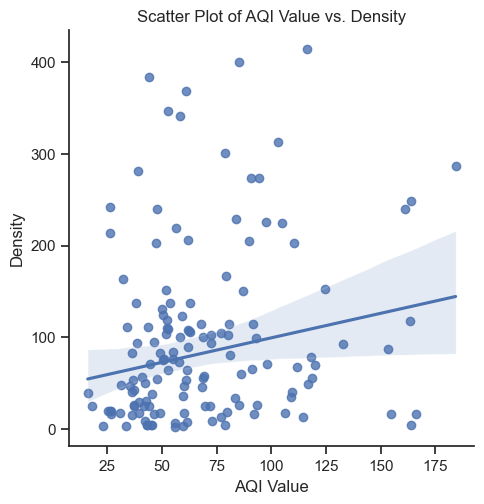

In [31]:
# Creating a scatter plot
sns.lmplot(x='AQI by Country', y='Density by Country', data=filtered_subset, robust=True)
plt.title('Scatter Plot of AQI Value vs. Density')
plt.xlabel('AQI Value')
plt.ylabel('Density')
plt.show()

> Contrary to what I imagined, there is no correlation between AQI and Density values. I will explore others relationship to test the hyphotesis

### Key Question #5: What are the cities with the highest and lowest AQI values?

In [32]:
# Calculating the average AQI value for each country
AQI_by_city = df.groupby('City')['AQI Value'].mean().reset_index()

In [33]:
# Renaming new variable
AQI_by_city.rename(columns={'AQI Value': 'Avg AQI by City'}, inplace=True)

In [34]:
# Merge 'AQI_by_city' with 'df' to include the country information
result = pd.merge(AQI_by_city, df[['City', 'Country']], on='City', how='left')

In [35]:
# Sorting result
result.sort_values(by='Avg AQI by City', ascending=False).head(25)

,City,Avg AQI by City,Country
5588,Jodhpur,500.0,India
1555,Boksburg,500.0,South Africa
7615,Maur,500.0,India
5478,Jalalabad,500.0,India
3213,Dhanaura,500.0,India
4756,Harunabad,500.0,Pakistan
4759,Hasanpur,500.0,India
3757,Etah,500.0,India
7300,Malaut,500.0,India
3151,Delhi,500.0,India


In [36]:
# Sorting result
result.sort_values(by='Avg AQI by City', ascending=True).head(25)

,City,Avg AQI by City,Country
7181,Macas,7.0,Ecuador
785,Azogues,8.0,Ecuador
12105,Tari,8.0,Papua New Guinea
5105,Huaraz,9.0,Peru
7397,Manokwari,10.0,Indonesia
5096,Huancavelica,10.0,Peru
8862,Nueva Loja,10.0,Ecuador
5093,Huamachuco,11.0,Peru
7714,Mendi,11.0,Papua New Guinea
10010,Puerto Madryn,11.0,Argentina


> There are 21 cities in the world with the maximum AQI Value (500) and 72% of these cities are from India

> While 80% of the cities with lowest AQI Values are in South America

### Hyphotesis

Forested area and Air Quality

Null Hypothesis (H0): There is no correlation between a country's forested area and its AQI values.

Alternative Hypothesis (H1): Countries with higher % of forested areas tend to have better air quality (lower AQI values).

### Export dataframe

In [39]:
# Exporting df as pickle
df_merged.to_csv(os.path.join(path, 'AQI_Merged.csv'))